# Пример работы с библиотекой на синтетических данных

Этот ноутбук демонстрирует использование библиотеки SOTA Recommender Systems для работы с синтетическими данными.

Мы рассмотрим:
1. Создание синтетических данных
2. Подготовку данных для обучения
3. Обучение различных моделей
4. Оценку качества моделей
5. Генерацию рекомендаций


## 1. Установка и импорт библиотек


In [1]:
!pip install matplotlib seaborn

In [2]:
# Если библиотека не установлена, раскомментируйте следующую строку:
# !pip install -e ..

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Добавляем путь к корневой директории проекта
sys.path.insert(0, '..')

# Импортируем необходимые компоненты библиотеки
from recommender import (
    EASERecommender,
    SLIMRecommender,
    SVDRecommender,
    SVDPlusPlusRecommender,
    ALSRecommender,
    create_synthetic_dataset,
    InteractionDataset,
    Evaluator
)

# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Библиотеки успешно импортированы!")


Библиотеки успешно импортированы!


## 2. Создание синтетических данных

Библиотека предоставляет функцию `create_synthetic_dataset` для создания синтетических данных. Мы создадим два типа наборов данных:
- **Implicit feedback** (неявные взаимодействия): пользователи просто взаимодействуют с товарами (1 = взаимодействие, 0 = нет взаимодействия)
- **Explicit feedback** (явные оценки): пользователи ставят оценки товарам (например, 1-5)


### 2.1 Создание данных с неявными взаимодействиями


In [3]:
# Создаем синтетический датасет с неявными взаимодействиями
df_implicit = create_synthetic_dataset(
    n_users=1000,          # Количество пользователей
    n_items=500,            # Количество товаров
    n_interactions=10000,   # Количество взаимодействий
    implicit=True,          # Неявные взаимодействия (все оценки = 1)
    seed=42                 # Для воспроизводимости
)

print(f"\nИнформация о датасете:")
print(f"  Всего взаимодействий: {len(df_implicit)}")
print(f"  Уникальных пользователей: {df_implicit['user_id'].nunique()}")
print(f"  Уникальных товаров: {df_implicit['item_id'].nunique()}")
print(f"\nПервые 5 строк:")
print(df_implicit.head())


Created synthetic dataset: 9910 interactions, 1000 users, 500 items

Информация о датасете:
  Всего взаимодействий: 9910
  Уникальных пользователей: 1000
  Уникальных товаров: 500

Первые 5 строк:
   user_id  item_id  rating   timestamp
0      102      441     1.0  1054077619
1      435      278     1.0  1570347220
2      860      250     1.0  1346177828
3      270      309     1.0  1382825031
4      106      207     1.0  1474643226


### 2.2 Визуализация данных


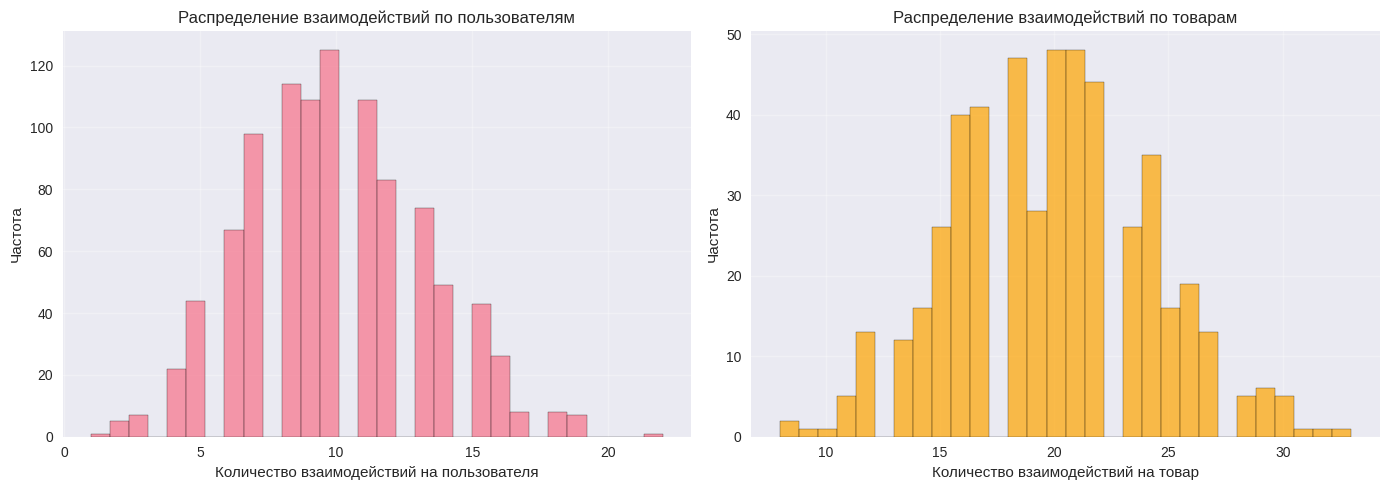


Статистика:
  Среднее взаимодействий на пользователя: 9.91
  Среднее взаимодействий на товар: 19.82
  Разреженность матрицы: 98.02%


In [4]:
# Визуализация распределения взаимодействий
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Распределение количества взаимодействий на пользователя
user_interactions = df_implicit.groupby('user_id').size()
axes[0].hist(user_interactions, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Количество взаимодействий на пользователя')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение взаимодействий по пользователям')
axes[0].grid(True, alpha=0.3)

# Распределение количества взаимодействий на товар
item_interactions = df_implicit.groupby('item_id').size()
axes[1].hist(item_interactions, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Количество взаимодействий на товар')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение взаимодействий по товарам')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nСтатистика:")
print(f"  Среднее взаимодействий на пользователя: {user_interactions.mean():.2f}")
print(f"  Среднее взаимодействий на товар: {item_interactions.mean():.2f}")
print(f"  Разреженность матрицы: {(1 - len(df_implicit) / (df_implicit['user_id'].nunique() * df_implicit['item_id'].nunique())) * 100:.2f}%")


### 2.3 Создание данных с явными оценками


In [5]:
# Создаем синтетический датасет с явными оценками
df_explicit = create_synthetic_dataset(
    n_users=500,
    n_items=300,
    n_interactions=5000,
    rating_range=(1, 5),  # Оценки от 1 до 5
    implicit=False,        # Явные оценки
    seed=42
)

print(f"\nИнформация о датасете с оценками:")
print(f"  Всего оценок: {len(df_explicit)}")
print(f"  Уникальных пользователей: {df_explicit['user_id'].nunique()}")
print(f"  Уникальных товаров: {df_explicit['item_id'].nunique()}")
print(f"\nРаспределение оценок:")
print(df_explicit['rating'].value_counts().sort_index())
print(f"\nПервые 5 строк:")
print(df_explicit.head())


Created synthetic dataset: 4918 interactions, 500 users, 300 items

Информация о датасете с оценками:
  Всего оценок: 4918
  Уникальных пользователей: 500
  Уникальных товаров: 300

Распределение оценок:
rating
1    1007
2     969
3     943
4     983
5    1016
Name: count, dtype: int64

Первые 5 строк:
   user_id  item_id  rating   timestamp
0      102      214       4  1448708042
1      435      119       5  1187222759
2      348       54       2  1131383999
3      270       26       1  1159382428
4      106      117       2  1243947210


## 3. Подготовка данных для обучения

Класс `InteractionDataset` предоставляет удобный интерфейс для работы с данными:
- Конвертация в разреженные матрицы
- Разделение на train/test
- Фильтрация редких пользователей/товаров


In [6]:
# Создаем InteractionDataset для неявных взаимодействий
dataset_implicit = InteractionDataset(
    df_implicit,
    implicit=True,                    # Указываем, что это неявные взаимодействия
    min_user_interactions=5,          # Минимальное количество взаимодействий на пользователя
    min_item_interactions=5          # Минимальное количество взаимодействий на товар
)

print(f"Информация о датасете после фильтрации:")
print(f"  Пользователей: {dataset_implicit.n_users}")
print(f"  Товаров: {dataset_implicit.n_items}")
print(f"  Взаимодействий: {len(dataset_implicit)}")

# Разделяем данные на обучающую и тестовую выборки
train_data, test_data = dataset_implicit.split(
    test_size=0.2,        # 20% на тест
    strategy='random'      # Случайное разделение
)

print(f"\nРазделение данных:")
print(f"  Обучающая выборка: {len(train_data)} взаимодействий")
print(f"  Тестовая выборка: {len(test_data)} взаимодействий")
print(f"  Соотношение train/test: {len(train_data) / len(test_data):.2f}")


Информация о датасете после фильтрации:
  Пользователей: 965
  Товаров: 500
  Взаимодействий: 9790

Разделение данных:
  Обучающая выборка: 7832 взаимодействий
  Тестовая выборка: 1958 взаимодействий
  Соотношение train/test: 4.00


## 4. Обучение моделей для неявных взаимодействий

Мы обучим несколько моделей, которые хорошо работают с неявными взаимодействиями:
- **EASE** - быстрая и эффективная модель
- **SLIM** - разреженная модель с регуляризацией
- **ALS** - Alternating Least Squares для неявных взаимодействий


### 4.1 EASE (Embarrassingly Shallow Autoencoders)


In [7]:
print("=" * 60)
print("Обучение модели EASE")
print("=" * 60)

# Создаем и обучаем модель EASE
ease_model = EASERecommender(
    l2_reg=500.0  # Параметр регуляризации L2
)

import time
start_time = time.time()
ease_model.fit(train_data.data)
training_time = time.time() - start_time

print(f"\nМодель обучена за {training_time:.2f} секунд")
print(f"Модель обучена: {ease_model.is_fitted}")


Обучение модели EASE
Training EASE model...
Computing Gram matrix...
Computing matrix inverse...
EASE training complete!

Модель обучена за 0.56 секунд
Модель обучена: True


### 4.2 SLIM (Sparse Linear Methods)


In [8]:
print("=" * 60)
print("Обучение модели SLIM")
print("=" * 60)

# Создаем и обучаем модель SLIM
slim_model = SLIMRecommender(
    l1_reg=0.1,      # L1 регуляризация (для разреженности)
    l2_reg=0.1,      # L2 регуляризация
    max_iter=50      # Максимальное количество итераций
)

start_time = time.time()
slim_model.fit(train_data.data)
training_time = time.time() - start_time

print(f"\nМодель обучена за {training_time:.2f} секунд")
print(f"Модель обучена: {slim_model.is_fitted}")


Обучение модели SLIM
Training SLIM model...
Training 500 item models...
  Item 100/500
  Item 200/500
  Item 300/500
  Item 400/500
  Item 500/500
SLIM training complete! Similarity matrix sparsity: 100.0%

Модель обучена за 12.78 секунд
Модель обучена: True


### 4.3 ALS (Alternating Least Squares)


In [9]:
print("=" * 60)
print("Обучение модели ALS")
print("=" * 60)

# Создаем и обучаем модель ALS
als_model = ALSRecommender(
    n_factors=20,        # Количество латентных факторов
    n_iterations=15,     # Количество итераций
    reg=0.01,            # Регуляризация
    alpha=40.0           # Масштабирование уверенности
)

start_time = time.time()
als_model.fit(train_data.data)
training_time = time.time() - start_time

print(f"\nМодель обучена за {training_time:.2f} секунд")
print(f"Модель обучена: {als_model.is_fitted}")


Обучение модели ALS
Training ALS model...


Running 15 ALS iterations...
  Iteration 5/15, Loss: 319274.6060
  Iteration 10/15, Loss: 228694.4185
  Iteration 15/15, Loss: 158252.7877
ALS training complete!

Модель обучена за 4.60 секунд
Модель обучена: True


## 5. Оценка качества моделей

Библиотека предоставляет класс `Evaluator` для комплексной оценки моделей. Мы будем использовать метрики:
- **Precision@K** - точность среди топ-K рекомендаций
- **Recall@K** - полнота среди топ-K рекомендаций
- **NDCG@K** - Normalized Discounted Cumulative Gain
- **Hit Rate** - доля пользователей, для которых есть хотя бы одна релевантная рекомендация


In [10]:
# Создаем оценщик с метриками
evaluator = Evaluator(
    metrics=['precision', 'recall', 'ndcg', 'hit_rate'],
    k_values=[5, 10, 20]  # Оцениваем для разных значений K
)

# Оцениваем все модели
models = {
    'EASE': ease_model,
    'SLIM': slim_model,
    'ALS': als_model
}

results = {}

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Оценка модели {model_name}")
    print(f"{'='*60}")
    
    model_results = evaluator.evaluate(
        model,
        test_data,
        task='ranking',           # Задача ранжирования
        exclude_train=True,       # Исключаем товары из обучающей выборки
        train_data=train_data     # Нужно для исключения уже просмотренных товаров
    )
    
    results[model_name] = model_results
    evaluator.print_results(model_results)



Оценка модели EASE

Evaluation Results

Top-5 Metrics:
  hit_rate       : 0.0397
  ndcg           : 0.0136
  precision      : 0.0082
  recall         : 0.0147

Top-10 Metrics:
  hit_rate       : 0.0673
  ndcg           : 0.0180
  precision      : 0.0069
  recall         : 0.0251

Top-20 Metrics:
  hit_rate       : 0.1070
  ndcg           : 0.0234
  precision      : 0.0055
  recall         : 0.0420


Оценка модели SLIM

Evaluation Results

Top-5 Metrics:
  hit_rate       : 0.0144
  ndcg           : 0.0041
  precision      : 0.0029
  recall         : 0.0045

Top-10 Metrics:
  hit_rate       : 0.0409
  ndcg           : 0.0088
  precision      : 0.0041
  recall         : 0.0159

Top-20 Metrics:
  hit_rate       : 0.0853
  ndcg           : 0.0150
  precision      : 0.0043
  recall         : 0.0356


Оценка модели ALS

Evaluation Results

Top-5 Metrics:
  hit_rate       : 0.0216
  ndcg           : 0.0072
  precision      : 0.0043
  recall         : 0.0090

Top-10 Metrics:
  hit_rate       :

### 5.1 Сравнение моделей


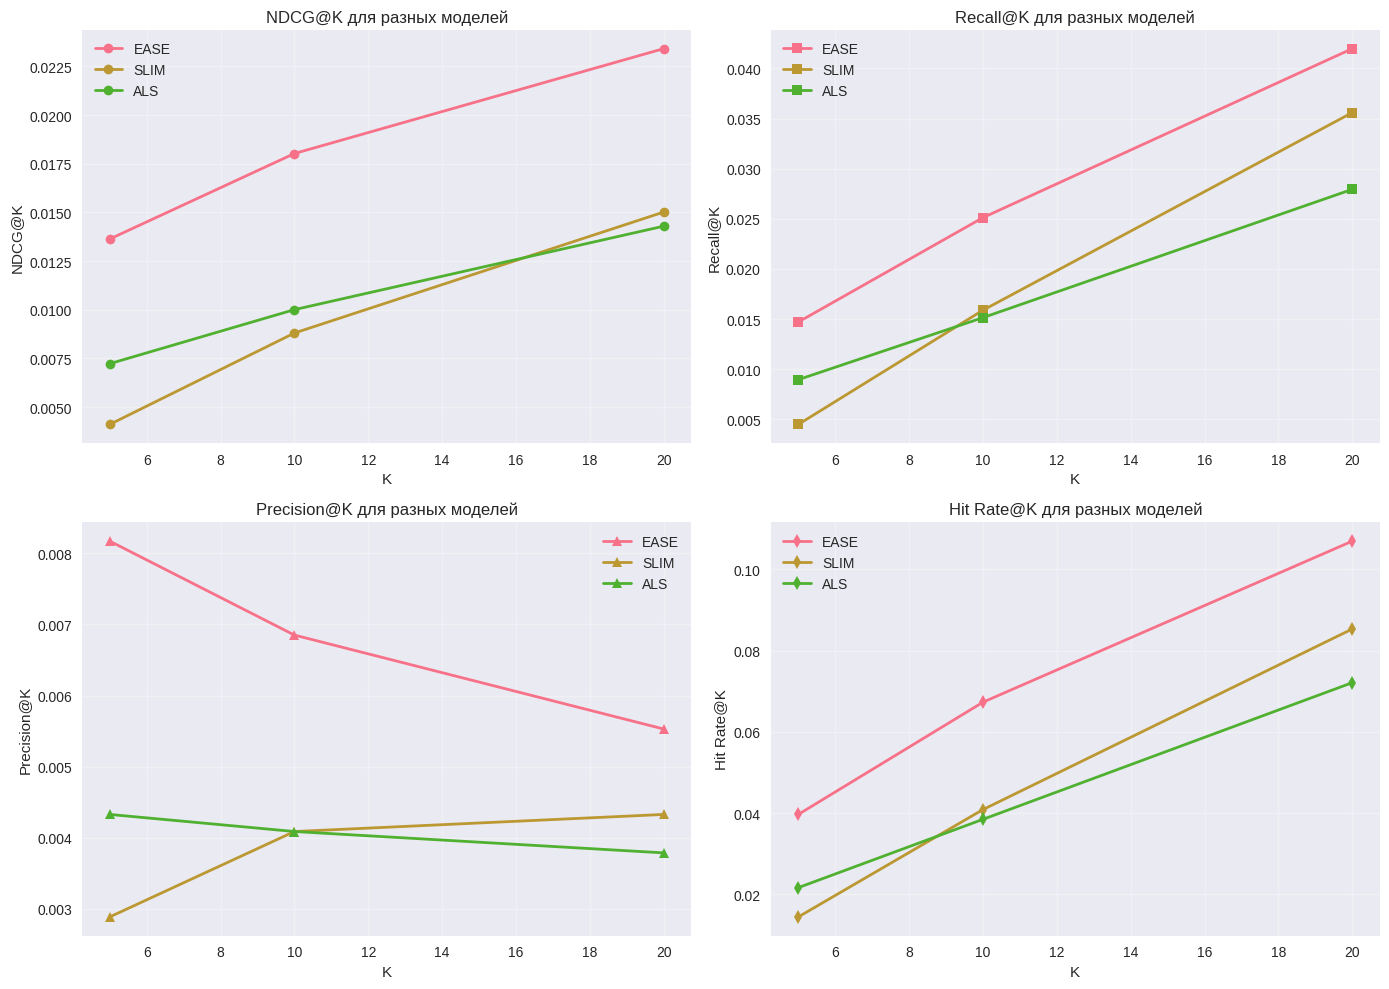


Сводная таблица результатов
      NDCG@10  Recall@10  Precision@10  Hit Rate@10
EASE   0.0180     0.0251        0.0069       0.0673
SLIM   0.0088     0.0159        0.0041       0.0409
ALS    0.0100     0.0151        0.0041       0.0385


In [11]:
# Сравниваем модели по NDCG@10
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# NDCG@K
k_values = [5, 10, 20]
for model_name in results:
    ndcg_values = [results[model_name].get(f'ndcg@{k}', 0) for k in k_values]
    axes[0, 0].plot(k_values, ndcg_values, marker='o', label=model_name, linewidth=2)
axes[0, 0].set_xlabel('K')
axes[0, 0].set_ylabel('NDCG@K')
axes[0, 0].set_title('NDCG@K для разных моделей')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Recall@K
for model_name in results:
    recall_values = [results[model_name].get(f'recall@{k}', 0) for k in k_values]
    axes[0, 1].plot(k_values, recall_values, marker='s', label=model_name, linewidth=2)
axes[0, 1].set_xlabel('K')
axes[0, 1].set_ylabel('Recall@K')
axes[0, 1].set_title('Recall@K для разных моделей')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision@K
for model_name in results:
    precision_values = [results[model_name].get(f'precision@{k}', 0) for k in k_values]
    axes[1, 0].plot(k_values, precision_values, marker='^', label=model_name, linewidth=2)
axes[1, 0].set_xlabel('K')
axes[1, 0].set_ylabel('Precision@K')
axes[1, 0].set_title('Precision@K для разных моделей')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Hit Rate@K
for model_name in results:
    hit_rate_values = [results[model_name].get(f'hit_rate@{k}', 0) for k in k_values]
    axes[1, 1].plot(k_values, hit_rate_values, marker='d', label=model_name, linewidth=2)
axes[1, 1].set_xlabel('K')
axes[1, 1].set_ylabel('Hit Rate@K')
axes[1, 1].set_title('Hit Rate@K для разных моделей')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Таблица сравнения
print("\n" + "=" * 60)
print("Сводная таблица результатов")
print("=" * 60)

comparison_data = {
    'NDCG@10': [results[m].get('ndcg@10', 0) for m in results],
    'Recall@10': [results[m].get('recall@10', 0) for m in results],
    'Precision@10': [results[m].get('precision@10', 0) for m in results],
    'Hit Rate@10': [results[m].get('hit_rate@10', 0) for m in results]
}

comparison_df = pd.DataFrame(comparison_data, index=list(results.keys()))
print(comparison_df.round(4))


## 6. Генерация рекомендаций

Теперь давайте посмотрим, какие рекомендации генерируют наши модели для конкретных пользователей.


In [12]:
# Выбираем несколько пользователей для демонстрации
sample_users = test_data.data['user_id'].unique()[:5]

print("=" * 60)
print("Рекомендации для выбранных пользователей")
print("=" * 60)

for user_id in sample_users:
    print(f"\nПользователь {user_id}:")
    
    # Получаем товары, которые пользователь уже видел
    seen_items = set(train_data.data[train_data.data['user_id'] == user_id]['item_id'].tolist())
    print(f"  Уже просмотренных товаров: {len(seen_items)}")
    
    # Получаем рекомендации от каждой модели
    for model_name, model in models.items():
        recommendations = model.recommend(
            [user_id],
            k=10,
            exclude_seen=True  # Исключаем уже просмотренные товары
        )
        
        if user_id in recommendations:
            recs = recommendations[user_id]
            item_ids = [item_id for item_id, score in recs[:5]]  # Берем топ-5
            print(f"  {model_name:6s}: {item_ids}")


Рекомендации для выбранных пользователей

Пользователь 449:
  Уже просмотренных товаров: 11
  EASE  : [np.int64(294), np.int64(367), np.int64(303), np.int64(83), np.int64(254)]
  SLIM  : [np.int64(160), np.int64(376), np.int64(393), np.int64(223), np.int64(202)]
  ALS   : [np.int64(446), np.int64(71), np.int64(165), np.int64(129), np.int64(300)]

Пользователь 434:
  Уже просмотренных товаров: 13
  EASE  : [np.int64(271), np.int64(343), np.int64(203), np.int64(17), np.int64(93)]
  SLIM  : [np.int64(160), np.int64(376), np.int64(393), np.int64(223), np.int64(202)]
  ALS   : [np.int64(343), np.int64(410), np.int64(203), np.int64(473), np.int64(163)]

Пользователь 213:
  Уже просмотренных товаров: 8
  EASE  : [np.int64(457), np.int64(46), np.int64(8), np.int64(408), np.int64(426)]
  SLIM  : [np.int64(160), np.int64(376), np.int64(393), np.int64(223), np.int64(202)]
  ALS   : [np.int64(328), np.int64(108), np.int64(442), np.int64(18), np.int64(455)]

Пользователь 604:
  Уже просмотренных то

## 7. Работа с явными оценками (Explicit Feedback)

Теперь давайте посмотрим, как работать с данными, где есть явные оценки (ratings). Для этого мы используем модели SVD и SVD++.


In [13]:
# Создаем датасет для явных оценок
dataset_explicit = InteractionDataset(
    df_explicit,
    implicit=False,  # Указываем, что это явные оценки
    min_user_interactions=3,
    min_item_interactions=3
)

train_explicit, test_explicit = dataset_explicit.split(test_size=0.2, strategy='random')

print(f"Датасет с явными оценками:")
print(f"  Пользователей: {dataset_explicit.n_users}")
print(f"  Товаров: {dataset_explicit.n_items}")
print(f"  Оценок в обучающей выборке: {len(train_explicit)}")
print(f"  Оценок в тестовой выборке: {len(test_explicit)}")


Датасет с явными оценками:
  Пользователей: 499
  Товаров: 300
  Оценок в обучающей выборке: 3932
  Оценок в тестовой выборке: 984


### 7.1 Обучение SVD модели


In [14]:
print("=" * 60)
print("Обучение модели SVD")
print("=" * 60)

svd_model = SVDRecommender(
    n_components=20  # Количество компонент для SVD
)

start_time = time.time()
svd_model.fit(train_explicit.data)
training_time = time.time() - start_time

print(f"\nМодель обучена за {training_time:.2f} секунд")

# Предсказываем оценки для тестовой выборки
test_sample = test_explicit.data.head(10)
predictions = svd_model.predict(
    test_sample['user_id'].values,
    test_sample['item_id'].values
)

print("\nПримеры предсказаний:")
comparison = pd.DataFrame({
    'user_id': test_sample['user_id'].values,
    'item_id': test_sample['item_id'].values,
    'actual_rating': test_sample['rating'].values,
    'predicted_rating': predictions
})
print(comparison)

# Вычисляем RMSE и MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

all_predictions = svd_model.predict(
    test_explicit.data['user_id'].values,
    test_explicit.data['item_id'].values
)

rmse = np.sqrt(mean_squared_error(test_explicit.data['rating'].values, all_predictions))
mae = mean_absolute_error(test_explicit.data['rating'].values, all_predictions)

print(f"\nМетрики качества:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")


Обучение модели SVD
Training SVD model...
Decomposing matrix with 20 components...
SVD training complete! Explained variance: 19.35%

Модель обучена за 0.41 секунд

Примеры предсказаний:
   user_id  item_id  actual_rating  predicted_rating
0      156        9              4         -0.079777
1      386      298              2          0.104881
2      162      213              3          0.015332
3      370      214              4          0.006552
4      416      283              4          0.566495
5      430      234              4         -0.067578
6      363      108              4          0.092976
7      213      187              5          0.974387
8      330      261              1          0.056693
9      242       56              2         -0.005049

Метрики качества:
  RMSE: 3.2502
  MAE: 2.9142


### 7.2 Обучение SVD++ модели


In [15]:
print("=" * 60)
print("Обучение модели SVD++")
print("=" * 60)

svdpp_model = SVDPlusPlusRecommender(
    n_factors=20,      # Количество латентных факторов
    n_epochs=20,      # Количество эпох
    lr=0.005,         # Скорость обучения
    reg=0.02          # Регуляризация
)

start_time = time.time()
svdpp_model.fit(train_explicit.data)
training_time = time.time() - start_time

print(f"\nМодель обучена за {training_time:.2f} секунд")

# Предсказываем оценки
all_predictions_svdpp = svdpp_model.predict(
    test_explicit.data['user_id'].values,
    test_explicit.data['item_id'].values
)

rmse_svdpp = np.sqrt(mean_squared_error(test_explicit.data['rating'].values, all_predictions_svdpp))
mae_svdpp = mean_absolute_error(test_explicit.data['rating'].values, all_predictions_svdpp)

print(f"\nМетрики качества SVD++:")
print(f"  RMSE: {rmse_svdpp:.4f}")
print(f"  MAE: {mae_svdpp:.4f}")

# Сравнение моделей
print(f"\nСравнение SVD и SVD++:")
print(f"  RMSE: SVD={rmse:.4f}, SVD++={rmse_svdpp:.4f}")
print(f"  MAE:  SVD={mae:.4f}, SVD++={mae_svdpp:.4f}")


Обучение модели SVD++
Training SVD++ model...
Training for 20 epochs...
  Epoch 1/20, RMSE: 1.4321
  Epoch 5/20, RMSE: 1.3702
  Epoch 10/20, RMSE: 1.3126
  Epoch 15/20, RMSE: 1.2625
  Epoch 20/20, RMSE: 1.2106
SVD++ training complete!

Модель обучена за 7.80 секунд

Метрики качества SVD++:
  RMSE: 1.4734
  MAE: 1.2805

Сравнение SVD и SVD++:
  RMSE: SVD=3.2502, SVD++=1.4734
  MAE:  SVD=2.9142, SVD++=1.2805


## 8. Сохранение и загрузка моделей

Библиотека поддерживает сохранение и загрузку обученных моделей.


In [16]:
# Сохраняем модель EASE
ease_model.save('ease_model_example.pkl')
print("Модель EASE сохранена в 'ease_model_example.pkl'")

# Загружаем модель
loaded_model = EASERecommender()
loaded_model.load('ease_model_example.pkl')
print(f"Модель загружена: {loaded_model.is_fitted}")

# Проверяем, что рекомендации совпадают
test_user = sample_users[0]
original_recs = ease_model.recommend([test_user], k=5)
loaded_recs = loaded_model.recommend([test_user], k=5)

print(f"\nРекомендации для пользователя {test_user}:")
print(f"  Оригинальная модель: {original_recs.get(test_user, [])}")
print(f"  Загруженная модель:  {loaded_recs.get(test_user, [])}")

# Удаляем временный файл
if os.path.exists('ease_model_example.pkl'):
    os.remove('ease_model_example.pkl')
    print("\nВременный файл удален")


Модель EASE сохранена в 'ease_model_example.pkl'
Модель загружена: True

Рекомендации для пользователя 449:
  Оригинальная модель: [(np.int64(294), 0.01620878014674239), (np.int64(367), 0.01567274605031683), (np.int64(303), 0.01559377838863858), (np.int64(83), 0.01546111446979826), (np.int64(254), 0.01515561205750905)]
  Загруженная модель:  [(np.int64(294), 0.01620878014674239), (np.int64(367), 0.01567274605031683), (np.int64(303), 0.01559377838863858), (np.int64(83), 0.01546111446979826), (np.int64(254), 0.01515561205750905)]

Временный файл удален


## Заключение

Этот ноутбук продемонстрировал:

1. ✅ Создание синтетических данных (как для неявных, так и для явных взаимодействий)
2. ✅ Подготовку данных с помощью `InteractionDataset`
3. ✅ Обучение различных моделей (EASE, SLIM, ALS, SVD, SVD++)
4. ✅ Оценку качества моделей с помощью метрик Precision, Recall, NDCG, Hit Rate
5. ✅ Визуализацию результатов сравнения моделей
6. ✅ Генерацию рекомендаций для пользователей
7. ✅ Сохранение и загрузку моделей

Библиотека предоставляет мощный и гибкий инструментарий для работы с системами рекомендаций. Вы можете использовать эти примеры как отправную точку для ваших собственных экспериментов!
